## 目標：利用CNN 和 SVM等模型 預測未來3日波動度 > 1.5%

## 載入Library

In [41]:
%pylab inline
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve



Populating the interactive namespace from numpy and matplotlib


## 資料載入 and 重新設定Header

In [42]:
df = pd.read_excel('data.xlsx', sheetname="Data001", header=None)

df.columns = ['日期', '月線差1','月線差2', '月線差3','月線差4', '月線差5', '月線差6','月線差7', '月線差8', \
              '月線差9', '月線差10', '季線差1', '季線差2','季線差3', '季線差4','季線差5', '季線差6','季線差7', \
              '季線差8','季線差9', '季線差10', 'DIF差1', 'DIF差2','DIF差3', 'DIF差4','DIF差5', 'DIF差6', \
              'DIF差7', 'DIF差8','DIF差9', 'DIF差10', '最高-最低', '最高-最低1','最高-最低2', '最高-最低3', \
              '最高-最低4', '最高-最低5','最高-最低6', '最高-最低7','最高-最低8', '最高-最低9', '指數漲跌差1', \
              '指數漲跌差2', '指數漲跌差3','指數漲跌差4', '指數漲跌差5','指數漲跌差6', '指數漲跌差7','指數漲跌差8', \
              '指數漲跌差9','指數漲跌差10','Close','波動度','Y']

df = df[df['波動度'] != 100] # 去除末端資料
df.tail()

,日期,月線差1,月線差2,月線差3,月線差4,月線差5,月線差6,月線差7,月線差8,月線差9,...,指數漲跌差4,指數漲跌差5,指數漲跌差6,指數漲跌差7,指數漲跌差8,指數漲跌差9,指數漲跌差10,Close,波動度,Y
4074,2017-12-12,-12.65,-23.30,-39.90,-57.75,-78.80,-91.40,-97.50,-106.7,-116.95,...,47,-140,-218,-172,-145,-297,-277,10431,0.517688,0
4075,2017-12-13,-9.40,-22.05,-32.70,-49.30,-67.15,-88.20,-100.80,-106.9,-116.10,...,85,66,-121,-199,-153,-126,-278,10450,0.488038,0
4076,2017-12-14,-4.50,-13.90,-26.55,-37.20,-53.80,-71.65,-92.70,-105.3,-111.40,...,131,162,143,-44,-122,-76,-49,10527,0.664957,0
4077,2017-12-15,-10.90,-15.40,-24.80,-37.45,-48.10,-64.70,-82.55,-103.6,-116.20,...,7,89,120,101,-86,-164,-118,10485,0.114449,0
4078,2017-12-18,-8.25,-19.15,-23.65,-33.05,-45.70,-56.35,-72.95,-90.8,-111.85,...,70,23,105,136,117,-70,-148,10501,0.057137,0


## X Y 資料確認

In [43]:
y = df['Y']
X = df.iloc[:,1:51]
X.head()

,月線差1,月線差2,月線差3,月線差4,月線差5,月線差6,月線差7,月線差8,月線差9,月線差10,...,指數漲跌差1,指數漲跌差2,指數漲跌差3,指數漲跌差4,指數漲跌差5,指數漲跌差6,指數漲跌差7,指數漲跌差8,指數漲跌差9,指數漲跌差10
0,-16.20,5038.50,5038.50,5038.50,5038.50,5038.50,5038.50,5038.50,5038.50,5038.50,...,-75,-165,-121,-69,-120,-64,-195,-220,-266,-312
1,-22.55,-38.75,5015.95,5015.95,5015.95,5015.95,5015.95,5015.95,5015.95,5015.95,...,-27,-102,-192,-148,-96,-147,-91,-222,-247,-293
2,-19.45,-42.00,-58.20,4996.50,4996.50,4996.50,4996.50,4996.50,4996.50,4996.50,...,23,-4,-79,-169,-125,-73,-124,-68,-199,-224
3,-25.95,-45.40,-67.95,-84.15,4970.55,4970.55,4970.55,4970.55,4970.55,4970.55,...,-45,-22,-49,-124,-214,-170,-118,-169,-113,-244
4,-31.05,-57.00,-76.45,-99.00,-115.20,4939.50,4939.50,4939.50,4939.50,4939.50,...,-53,-98,-75,-102,-177,-267,-223,-171,-222,-166


## 訓練資料 and 測試資料

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
X_train.shape

(3263, 50)

In [46]:
X_test.shape

(816, 50)

In [47]:
y_train.shape

(3263,)

In [48]:
y_test.shape

(816,)

## 尺度標準化

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[ 0.57805185,  0.2773885 ,  0.3410973 , ...,  0.54551493,
         0.31041511,  0.2925311 ],
       [ 0.35605387,  0.1946653 ,  0.25667997, ..., -0.08434131,
        -0.03445413, -0.26129372],
       [ 0.68785731,  0.28098516,  0.34716042, ...,  0.02880652,
         0.31041511,  0.27214491],
       ..., 
       [ 1.96732956,  0.91605267,  1.36203391, ...,  0.06275087,
         0.24997411,  0.8769352 ],
       [ 0.31786067,  0.0996107 ,  0.16853149, ...,  1.028279  ,
         1.03570712,  0.41824593],
       [ 0.5732777 ,  0.23474238,  0.21237253, ...,  0.38710797,
        -0.32599307, -0.15596508]])

In [50]:
X_test = sc.transform(X_test)
X_test

array([[ 0.17224909,  0.08727929,  0.15500606, ..., -1.04232625,
        -1.08328325, -0.7029945 ],
       [-0.25742443, -0.10077468, -0.1308935 , ..., -0.59350653,
        -0.53931425, -0.60785895],
       [ 0.61863213,  0.32825556,  0.56963039, ..., -0.71042595,
        -0.86640672, -0.81851624],
       ..., 
       [-0.25503736, -0.06891854, -0.2572863 , ...,  0.10801   ,
         1.40901918,  1.90643777],
       [-0.38393941, -0.19223262, -0.27547566, ...,  0.48139783,
         0.58417729,  0.61531243],
       [ 0.75946956,  0.15767108,  0.11582896, ...,  0.34939203,
         0.39574358,  0.25855411]])

## 訓練ANN

In [51]:
X_train.shape

(3263, 50)

In [52]:
classifier = Sequential()

classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 50))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 25))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [53]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/2000
3263/3263 [==============================] - 1s - loss: 0.6714 - acc: 0.5599     
Epoch 2/2000
3263/3263 [==============================] - 1s - loss: 0.6517 - acc: 0.6537     
Epoch 3/2000
3263/3263 [==============================] - 1s - loss: 0.6460 - acc: 0.6592     
Epoch 4/2000
3263/3263 [==============================] - 1s - loss: 0.6419 - acc: 0.6614     
Epoch 5/2000
3263/3263 [==============================] - 1s - loss: 0.6386 - acc: 0.6607     
Epoch 6/2000
3263/3263 [==============================] - 1s - loss: 0.6370 - acc: 0.6638     
Epoch 7/2000
3263/3263 [==============================] - 1s - loss: 0.6332 - acc: 0.6629     
Epoch 8/2000
3263/3263 [==============================] - 1s - loss: 0.6313 - acc: 0.6669     
Epoch 9/2000
3263/3263 [==============================] - 1s - loss: 0.6272 - acc: 0.6705     
Epoch 10/2000
3263/3263 [==============================] - 1s - loss: 0.6276 - acc: 0.6656     
Epoch 11/2000
3263/3263 [========================

3263/3263 [==============================] - 1s - loss: 0.4384 - acc: 0.8023     
Epoch 171/2000
3263/3263 [==============================] - 1s - loss: 0.4310 - acc: 0.7990     
Epoch 172/2000
3263/3263 [==============================] - 1s - loss: 0.4367 - acc: 0.7971     
Epoch 173/2000
3263/3263 [==============================] - 1s - loss: 0.4316 - acc: 0.8005     
Epoch 174/2000
3263/3263 [==============================] - 1s - loss: 0.4355 - acc: 0.7968     
Epoch 175/2000
3263/3263 [==============================] - 1s - loss: 0.4450 - acc: 0.7934     
Epoch 176/2000
3263/3263 [==============================] - 1s - loss: 0.4301 - acc: 0.8020     
Epoch 177/2000
3263/3263 [==============================] - 1s - loss: 0.4315 - acc: 0.8029     
Epoch 178/2000
3263/3263 [==============================] - 1s - loss: 0.4246 - acc: 0.8045     
Epoch 179/2000
3263/3263 [==============================] - 1s - loss: 0.4346 - acc: 0.7990     
Epoch 180/2000
3263/3263 [===================

3263/3263 [==============================] - 1s - loss: 0.3511 - acc: 0.8388     
Epoch 339/2000
3263/3263 [==============================] - 1s - loss: 0.3231 - acc: 0.8538     
Epoch 340/2000
3263/3263 [==============================] - 1s - loss: 0.3405 - acc: 0.8486     
Epoch 341/2000
3263/3263 [==============================] - 1s - loss: 0.3396 - acc: 0.8422     
Epoch 342/2000
3263/3263 [==============================] - 1s - loss: 0.3723 - acc: 0.8363     
Epoch 343/2000
3263/3263 [==============================] - 1s - loss: 0.3109 - acc: 0.8569     
Epoch 344/2000
3263/3263 [==============================] - 1s - loss: 0.3184 - acc: 0.8553     
Epoch 345/2000
3263/3263 [==============================] - 1s - loss: 0.3011 - acc: 0.8639     
Epoch 346/2000
3263/3263 [==============================] - 1s - loss: 0.3268 - acc: 0.8468     
Epoch 347/2000
3263/3263 [==============================] - 1s - loss: 0.3333 - acc: 0.8462     
Epoch 348/2000
3263/3263 [===================

3263/3263 [==============================] - 1s - loss: 0.3119 - acc: 0.8603     
Epoch 507/2000
3263/3263 [==============================] - 1s - loss: 0.2916 - acc: 0.8667     
Epoch 508/2000
3263/3263 [==============================] - 1s - loss: 0.2769 - acc: 0.8713     
Epoch 509/2000
3263/3263 [==============================] - 1s - loss: 0.2966 - acc: 0.8648     
Epoch 510/2000
3263/3263 [==============================] - 1s - loss: 0.2793 - acc: 0.8768     
Epoch 511/2000
3263/3263 [==============================] - 1s - loss: 0.2729 - acc: 0.8740     
Epoch 512/2000
3263/3263 [==============================] - 1s - loss: 0.2762 - acc: 0.8728     
Epoch 513/2000
3263/3263 [==============================] - 1s - loss: 0.3009 - acc: 0.8642     
Epoch 514/2000
3263/3263 [==============================] - 1s - loss: 0.2631 - acc: 0.8768     
Epoch 515/2000
3263/3263 [==============================] - 1s - loss: 0.2800 - acc: 0.8701     
Epoch 516/2000
3263/3263 [===================

3263/3263 [==============================] - 1s - loss: 0.3131 - acc: 0.8624     
Epoch 675/2000
3263/3263 [==============================] - 1s - loss: 0.2836 - acc: 0.8713     
Epoch 676/2000
3263/3263 [==============================] - 1s - loss: 0.2424 - acc: 0.8814     
Epoch 677/2000
3263/3263 [==============================] - 1s - loss: 0.2405 - acc: 0.8835     
Epoch 678/2000
3263/3263 [==============================] - 1s - loss: 0.2589 - acc: 0.8814     
Epoch 679/2000
3263/3263 [==============================] - 1s - loss: 0.2272 - acc: 0.8881     
Epoch 680/2000
3263/3263 [==============================] - 1s - loss: 0.2175 - acc: 0.8924     
Epoch 681/2000
3263/3263 [==============================] - 1s - loss: 0.2423 - acc: 0.8789     
Epoch 682/2000
3263/3263 [==============================] - 1s - loss: 0.2763 - acc: 0.8701     
Epoch 683/2000
3263/3263 [==============================] - 1s - loss: 0.2596 - acc: 0.8768     
Epoch 684/2000
3263/3263 [===================

3263/3263 [==============================] - 1s - loss: 0.3336 - acc: 0.8633     
Epoch 843/2000
3263/3263 [==============================] - 1s - loss: 0.2251 - acc: 0.8930     
Epoch 844/2000
3263/3263 [==============================] - 1s - loss: 0.2043 - acc: 0.9041     
Epoch 845/2000
3263/3263 [==============================] - 1s - loss: 0.2063 - acc: 0.9050     
Epoch 846/2000
3263/3263 [==============================] - 1s - loss: 0.2061 - acc: 0.9025     
Epoch 847/2000
3263/3263 [==============================] - 1s - loss: 0.2270 - acc: 0.8964     
Epoch 848/2000
3263/3263 [==============================] - 1s - loss: 0.2157 - acc: 0.9029     
Epoch 849/2000
3263/3263 [==============================] - 1s - loss: 0.2201 - acc: 0.8992     
Epoch 850/2000
3263/3263 [==============================] - 1s - loss: 0.2376 - acc: 0.8955     
Epoch 851/2000
3263/3263 [==============================] - 1s - loss: 0.2003 - acc: 0.9074     
Epoch 852/2000
3263/3263 [===================

3263/3263 [==============================] - 1s - loss: 0.1918 - acc: 0.9124     
Epoch 1011/2000
3263/3263 [==============================] - 1s - loss: 0.1779 - acc: 0.9203     
Epoch 1012/2000
3263/3263 [==============================] - 1s - loss: 0.2184 - acc: 0.9038     
Epoch 1013/2000
3263/3263 [==============================] - 1s - loss: 0.2164 - acc: 0.9007     
Epoch 1014/2000
3263/3263 [==============================] - 1s - loss: 0.2434 - acc: 0.8854     
Epoch 1015/2000
3263/3263 [==============================] - 1s - loss: 0.2211 - acc: 0.8964     
Epoch 1016/2000
3263/3263 [==============================] - 1s - loss: 0.1939 - acc: 0.9105     
Epoch 1017/2000
3263/3263 [==============================] - 1s - loss: 0.1862 - acc: 0.9200     
Epoch 1018/2000
3263/3263 [==============================] - 1s - loss: 0.1953 - acc: 0.9114     
Epoch 1019/2000
3263/3263 [==============================] - 1s - loss: 0.2574 - acc: 0.8881     
Epoch 1020/2000
3263/3263 [=========

3263/3263 [==============================] - 1s - loss: 0.1900 - acc: 0.9148     
Epoch 1177/2000
3263/3263 [==============================] - 1s - loss: 0.1964 - acc: 0.9148     
Epoch 1178/2000
3263/3263 [==============================] - 1s - loss: 0.1727 - acc: 0.9283     
Epoch 1179/2000
3263/3263 [==============================] - 1s - loss: 0.1818 - acc: 0.9225     
Epoch 1180/2000
3263/3263 [==============================] - 1s - loss: 0.2742 - acc: 0.8884     
Epoch 1181/2000
3263/3263 [==============================] - 1s - loss: 0.1832 - acc: 0.9163     
Epoch 1182/2000
3263/3263 [==============================] - 1s - loss: 0.1837 - acc: 0.9268     
Epoch 1183/2000
3263/3263 [==============================] - 1s - loss: 0.1898 - acc: 0.9173     
Epoch 1184/2000
3263/3263 [==============================] - 1s - loss: 0.1687 - acc: 0.9203     
Epoch 1185/2000
3263/3263 [==============================] - 1s - loss: 0.1706 - acc: 0.9234     
Epoch 1186/2000
3263/3263 [=========

3263/3263 [==============================] - 1s - loss: 0.1712 - acc: 0.9219     
Epoch 1343/2000
3263/3263 [==============================] - 1s - loss: 0.1752 - acc: 0.9249     
Epoch 1344/2000
3263/3263 [==============================] - 1s - loss: 0.2180 - acc: 0.9078     
Epoch 1345/2000
3263/3263 [==============================] - 1s - loss: 0.1942 - acc: 0.9194     
Epoch 1346/2000
3263/3263 [==============================] - 1s - loss: 0.1542 - acc: 0.9320     
Epoch 1347/2000
3263/3263 [==============================] - 1s - loss: 0.1716 - acc: 0.9283     
Epoch 1348/2000
3263/3263 [==============================] - 1s - loss: 0.1705 - acc: 0.9231     
Epoch 1349/2000
3263/3263 [==============================] - 1s - loss: 0.1694 - acc: 0.9258     
Epoch 1350/2000
3263/3263 [==============================] - 1s - loss: 0.1466 - acc: 0.9387     
Epoch 1351/2000
3263/3263 [==============================] - 1s - loss: 0.1498 - acc: 0.9369     
Epoch 1352/2000
3263/3263 [=========

3263/3263 [==============================] - 1s - loss: 0.1690 - acc: 0.9301     
Epoch 1509/2000
3263/3263 [==============================] - 1s - loss: 0.1434 - acc: 0.9369     
Epoch 1510/2000
3263/3263 [==============================] - 1s - loss: 0.1378 - acc: 0.9409     
Epoch 1511/2000
3263/3263 [==============================] - 1s - loss: 0.1413 - acc: 0.9359     
Epoch 1512/2000
3263/3263 [==============================] - 1s - loss: 0.1502 - acc: 0.9350     
Epoch 1513/2000
3263/3263 [==============================] - 1s - loss: 0.1983 - acc: 0.9240     
Epoch 1514/2000
3263/3263 [==============================] - 1s - loss: 0.1491 - acc: 0.9353     
Epoch 1515/2000
3263/3263 [==============================] - 1s - loss: 0.1544 - acc: 0.9304     
Epoch 1516/2000
3263/3263 [==============================] - 1s - loss: 0.1494 - acc: 0.9323     
Epoch 1517/2000
3263/3263 [==============================] - 1s - loss: 0.1937 - acc: 0.9160     
Epoch 1518/2000
3263/3263 [=========

3263/3263 [==============================] - 1s - loss: 0.2066 - acc: 0.9102     
Epoch 1675/2000
3263/3263 [==============================] - 1s - loss: 0.1726 - acc: 0.9237     
Epoch 1676/2000
3263/3263 [==============================] - 1s - loss: 0.1331 - acc: 0.9430     
Epoch 1677/2000
3263/3263 [==============================] - 1s - loss: 0.1319 - acc: 0.9451     
Epoch 1678/2000
3263/3263 [==============================] - 1s - loss: 0.1333 - acc: 0.9436     
Epoch 1679/2000
3263/3263 [==============================] - 1s - loss: 0.1306 - acc: 0.9448     
Epoch 1680/2000
3263/3263 [==============================] - 1s - loss: 0.1774 - acc: 0.9188     
Epoch 1681/2000
3263/3263 [==============================] - 1s - loss: 0.1572 - acc: 0.9320     
Epoch 1682/2000
3263/3263 [==============================] - 1s - loss: 0.1412 - acc: 0.9418     
Epoch 1683/2000
3263/3263 [==============================] - 1s - loss: 0.1253 - acc: 0.9485     
Epoch 1684/2000
3263/3263 [=========

3263/3263 [==============================] - 1s - loss: 0.1158 - acc: 0.9516     
Epoch 1840/2000
3263/3263 [==============================] - 0s - loss: 0.1393 - acc: 0.9393     
Epoch 1841/2000
3263/3263 [==============================] - 0s - loss: 0.1917 - acc: 0.9197     
Epoch 1842/2000
3263/3263 [==============================] - 0s - loss: 0.2009 - acc: 0.9176     
Epoch 1843/2000
3263/3263 [==============================] - 0s - loss: 0.1661 - acc: 0.9295     
Epoch 1844/2000
3263/3263 [==============================] - 0s - loss: 0.1348 - acc: 0.9433     
Epoch 1845/2000
3263/3263 [==============================] - 0s - loss: 0.1288 - acc: 0.9470     
Epoch 1846/2000
3263/3263 [==============================] - 0s - loss: 0.1779 - acc: 0.9258     
Epoch 1847/2000
3263/3263 [==============================] - 0s - loss: 0.1785 - acc: 0.9252     
Epoch 1848/2000
3263/3263 [==============================] - 0s - loss: 0.1429 - acc: 0.9356     
Epoch 1849/2000
3263/3263 [=========

## 預測與驗證模型

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
y_pred = (y_pred > 0.5)

In [56]:
sum(y_pred.flatten().astype(int) == y_test) / len(y_test)

0.59068627450980393

In [57]:
cm = confusion_matrix(y_test, y_pred )
cm

array([[320, 167],
       [167, 162]])

## 繪製ANN 的 ROC Curve

In [58]:
y_pred = classifier.predict(X_test)
predicted = (y_pred > 0.5).flatten().astype(int)

In [59]:
predicted

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1,

In [60]:
confusion_matrix(y_test, predicted)

array([[320, 167],
       [167, 162]])

In [61]:
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

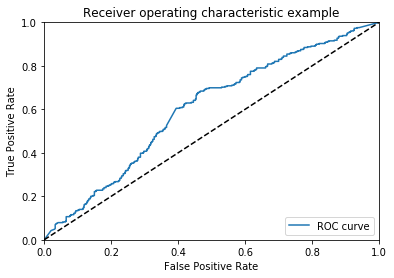

In [62]:
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 比較不同分類器準確度

In [63]:
# ANN
classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(X_train, y_train)

clf3 = LogisticRegression()
clf3.fit(X_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

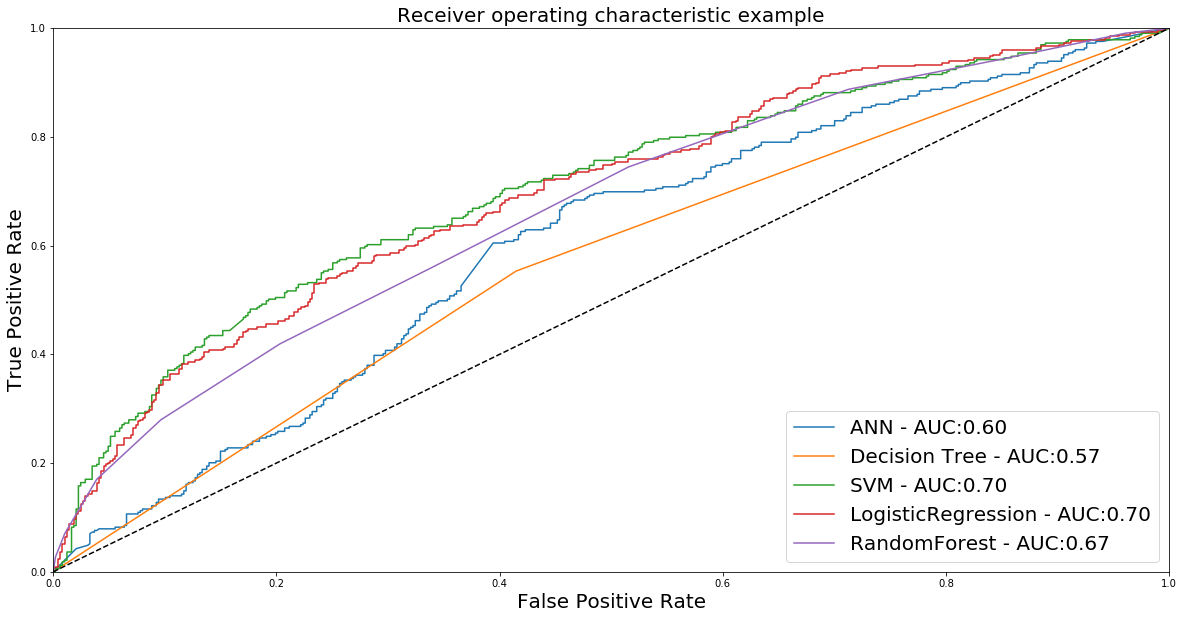

In [65]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()